<a href="https://colab.research.google.com/github/DanAlin19/AAD/blob/main/AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install pycountry

In [ ]:
import kaggle

kaggle.api.dataset_download_files('atharvasoundankar/global-music-streaming-trends-and-listener-insights', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-music-streaming-trends-and-listener-insights


In [ ]:
import pandas as pd
df = pd.read_csv('./data/Global_Music_Streaming_Listener_Preferences.csv', sep=',')
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


Detalii despre valorile din coloane

In [ ]:
df.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

Verificare valori nule

In [ ]:
df.isnull().sum()

,0
User_ID,0
Age,0
Country,0
Streaming Platform,0
Top Genre,0
Minutes Streamed Per Day,0
Number of Songs Liked,0
Most Played Artist,0
Subscription Type,0
Listening Time (Morning/Afternoon/Night),0


Verificare valori duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

Verificari inconsistente de format sau scriere

In [ ]:
df['Listening Time (Morning/Afternoon/Night)'].unique()

array(['Afternoon', 'Night', 'Morning'], dtype=object)

In [ ]:
df['Streaming Platform'].unique()

array(['Tidal', 'Deezer', 'YouTube', 'Amazon Music', 'Spotify',
       'Apple Music'], dtype=object)

In [ ]:
df['Top Genre'].unique()

array(['Reggae', 'Country', 'Pop', 'EDM', 'Classical', 'Metal', 'Rock',
       'Hip-Hop', 'R&B', 'Jazz'], dtype=object)

In [ ]:
df['Country'].unique()

array(['Japan', 'Germany', 'Australia', 'South Korea', 'UK', 'Brazil',
       'Canada', 'India', 'USA', 'France'], dtype=object)

In [ ]:
df['Country'].unique()

array(['Japan', 'Germany', 'Australia', 'South Korea', 'UK', 'Brazil',
       'Canada', 'India', 'USA', 'France'], dtype=object)

In [ ]:
df['Most Played Artist'].unique()

array(['Adele', 'Ed Sheeran', 'Post Malone', 'Dua Lipa', 'The Weeknd',
       'Billie Eilish', 'BTS', 'Taylor Swift', 'Drake', 'Bad Bunny'],
      dtype=object)

In [ ]:
df['Subscription Type'].unique()

array(['Free', 'Premium'], dtype=object)

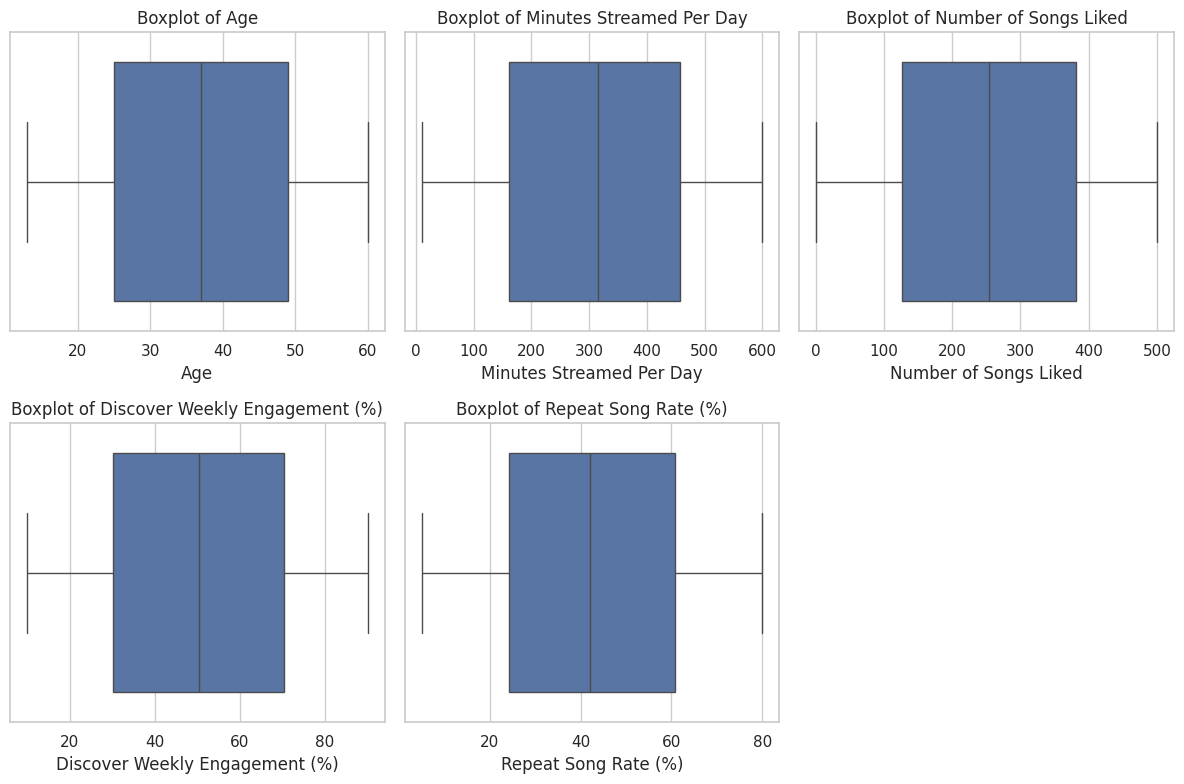

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Analiza cantitativa cu vizualizari


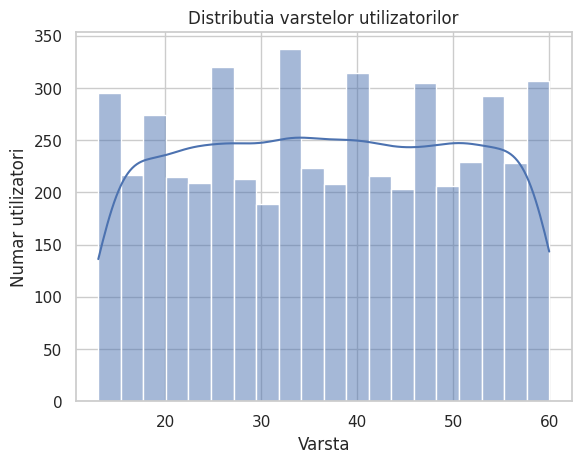

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distributia varstelor utilizatorilor")
plt.xlabel("Varsta")
plt.ylabel("Numar utilizatori")
plt.show()

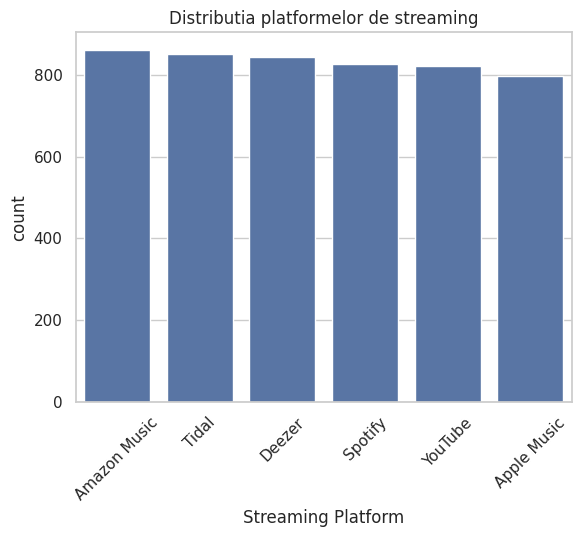

In [ ]:
sns.countplot(x='Streaming Platform', data=df, order=df['Streaming Platform'].value_counts().index)
plt.title("Distributia platformelor de streaming")
plt.xticks(rotation=45)
plt.show()

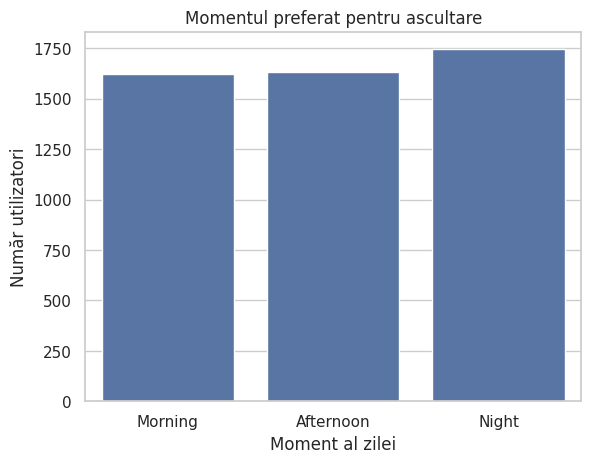

In [ ]:
sns.countplot(x='Listening Time (Morning/Afternoon/Night)', data=df, order=['Morning', 'Afternoon', 'Night'])
plt.title("Momentul preferat pentru ascultare")
plt.xlabel("Moment al zilei")
plt.ylabel("Număr utilizatori")
plt.show()


<ipython-input-112-1d3fbcbbf46f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




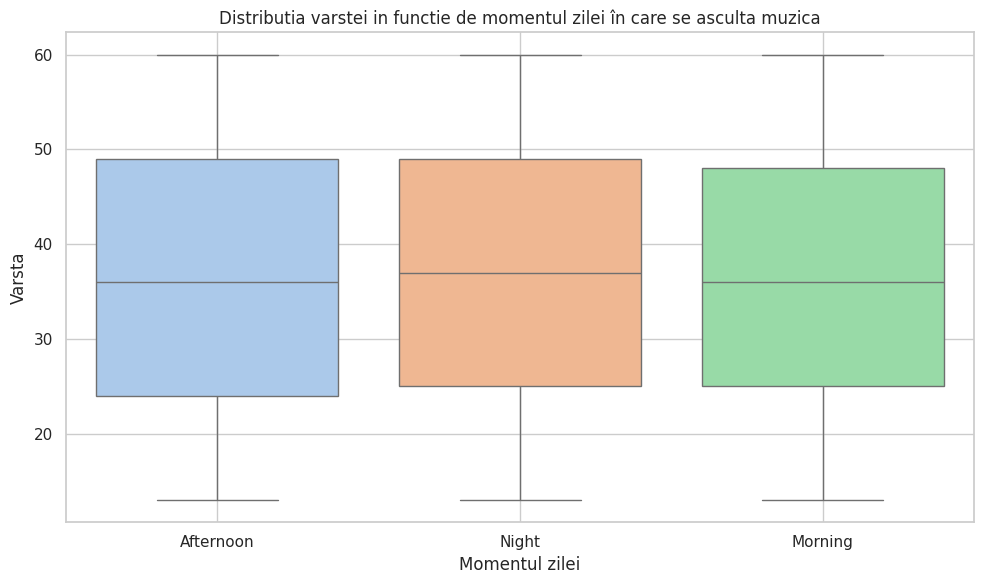

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Listening Time (Morning/Afternoon/Night)', y='Age', data=df, palette='pastel')

plt.title('Distributia varstei in functie de momentul zilei în care se asculta muzica')
plt.xlabel('Momentul zilei')
plt.ylabel('Varsta')
plt.grid(True)
plt.tight_layout()
plt.show()

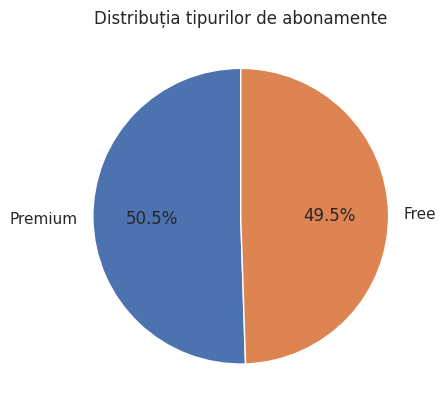

In [ ]:
df['Subscription Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribuția tipurilor de abonamente")
plt.ylabel("")
plt.show()


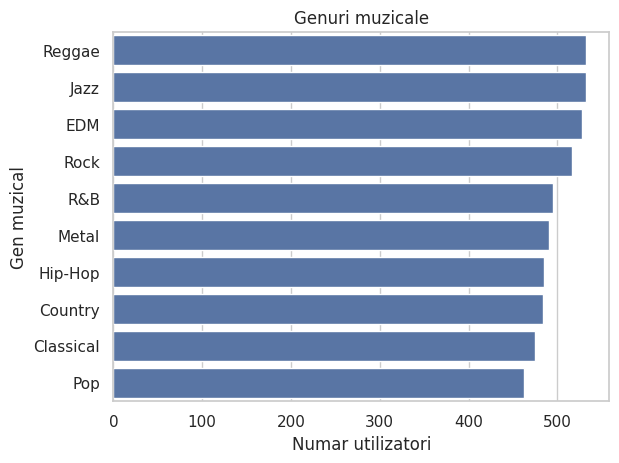

In [ ]:
top_genres = df['Top Genre'].value_counts()
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Genuri muzicale")
plt.xlabel("Numar utilizatori")
plt.ylabel("Gen muzical")
plt.show()


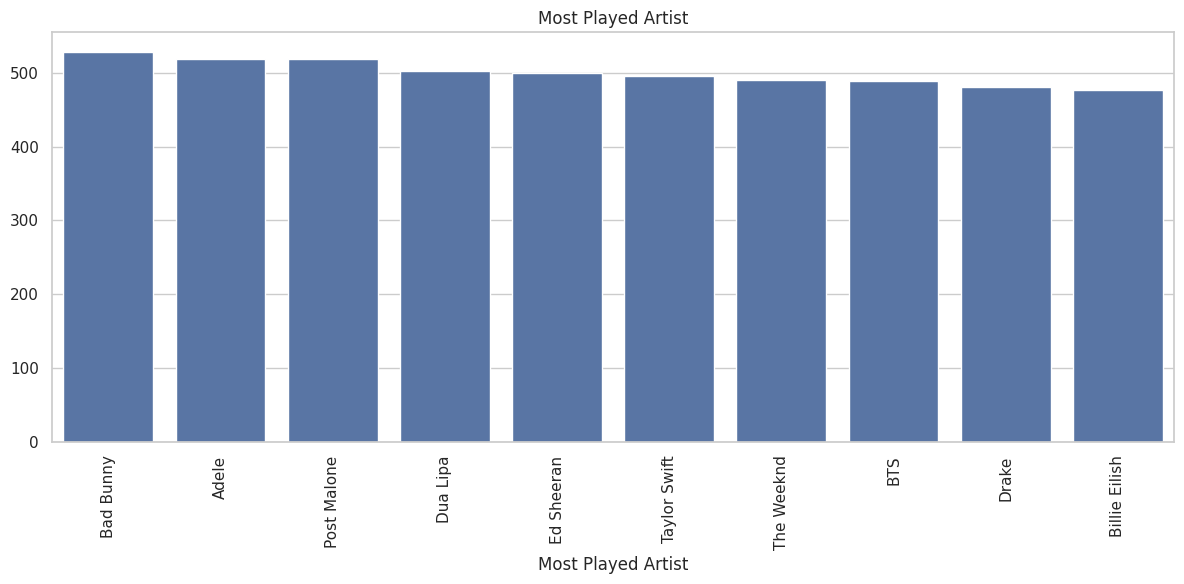

In [ ]:
most_played_artist_counts = df['Most Played Artist'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=most_played_artist_counts.index, y=most_played_artist_counts.values)
plt.title('Most Played Artist')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

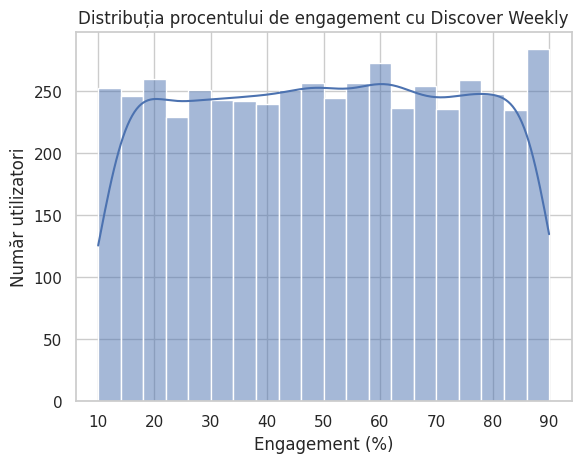

In [ ]:
sns.histplot(df['Discover Weekly Engagement (%)'], bins=20, kde=True)
plt.title("Distribuția procentului de engagement cu Discover Weekly")
plt.xlabel("Engagement (%)")
plt.ylabel("Număr utilizatori")
plt.show()


Corelari

Corelari valori numerice

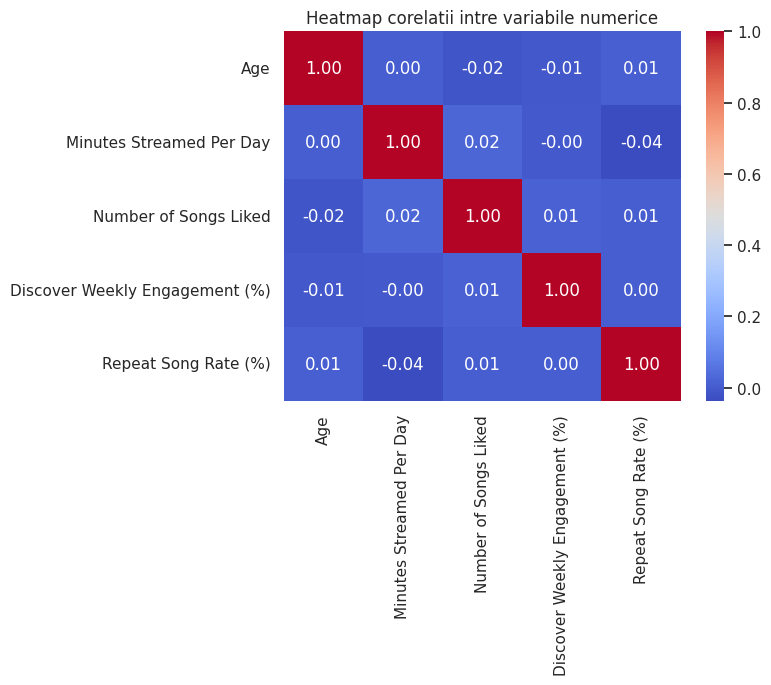

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap corelatii intre variabile numerice")
plt.show()

Corelari varsta si minute ascultate pe zi (vrem sa vedem daca varsta influenteaza cat de mult timp petrec persoanele ascultand muzica)

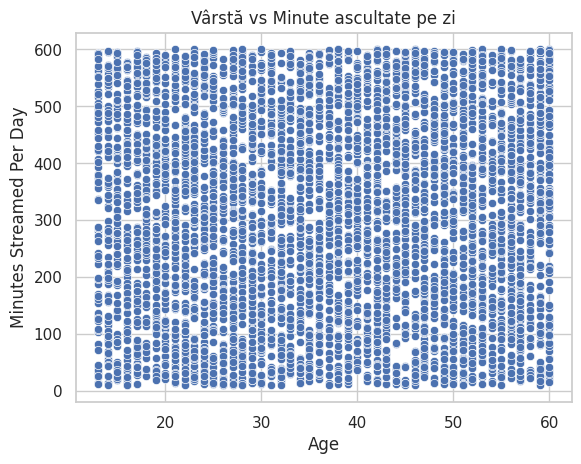

,Age,Minutes Streamed Per Day
Age,1.000000,0.004166
Minutes Streamed Per Day,0.004166,1.000000


In [ ]:
sns.scatterplot(x='Age', y='Minutes Streamed Per Day', data=df)
plt.title("Vârstă vs Minute ascultate pe zi")
plt.show()

df[['Age', 'Minutes Streamed Per Day']].corr()


Corelari intre numar melodii apreciate si timp de ascultare zilnic (vrem sa vedem daca cei care petrec mai mult timp ascultand muzica dau like la mai multe piese)

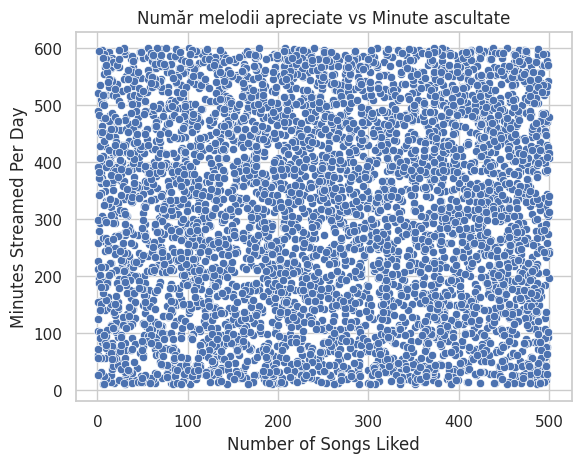

,Number of Songs Liked,Minutes Streamed Per Day
Number of Songs Liked,1.000000,0.023487
Minutes Streamed Per Day,0.023487,1.000000


In [ ]:
sns.scatterplot(x='Number of Songs Liked', y='Minutes Streamed Per Day', data=df)
plt.title("Număr melodii apreciate vs Minute ascultate")
plt.show()

df[['Number of Songs Liked', 'Minutes Streamed Per Day']].corr()


Corelari intre rata de descoperire a pieselor noi saptamanala si rata de repetare a pieselor (vrem sa vedem daca cei care descopera muzica noua, nu repeta aceleasi piese)

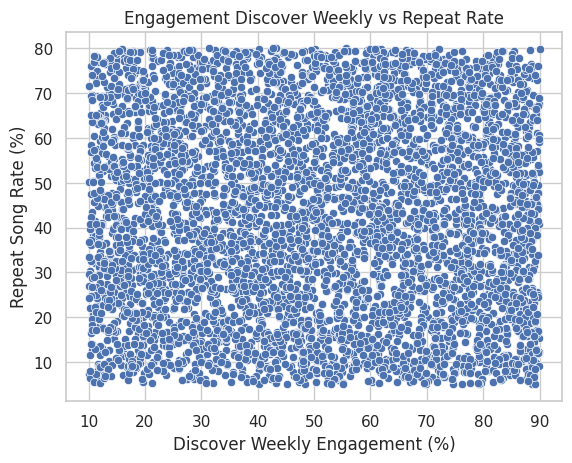

,Discover Weekly Engagement (%),Repeat Song Rate (%)
Discover Weekly Engagement (%),1.000000,0.004186
Repeat Song Rate (%),0.004186,1.000000


In [ ]:
sns.scatterplot(x='Discover Weekly Engagement (%)', y='Repeat Song Rate (%)', data=df)
plt.title("Engagement Discover Weekly vs Repeat Rate")
plt.show()

df[['Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].corr()


Corelari intre tipul de subscriptie si minutele de ascultare zilnice (vrem sa vedem daca tipul de subscriptie influenteaza timpul de ascultare)

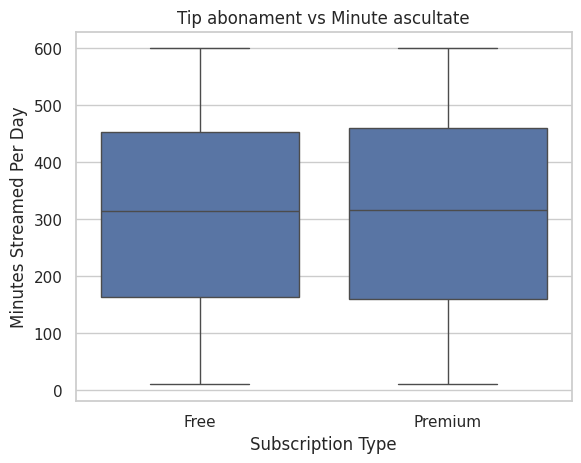

In [ ]:
df.groupby('Subscription Type')['Minutes Streamed Per Day'].mean()
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=df)
plt.title("Tip abonament vs Minute ascultate")
plt.show()

In [ ]:
# Împărțirea dataset-ului pe intervale de vârstă
df_13_24 = df[(df['Age'] >= 13) & (df['Age'] <= 24)]
df_25_39 = df[(df['Age'] >= 25) & (df['Age'] <= 39)]
df_40_60 = df[(df['Age'] >= 40) & (df['Age'] <= 60)]

In [ ]:
df_13_24.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,18.550413,311.215702,262.401653,49.900727,41.570364
std,3.457819,173.754170,147.190347,23.092128,21.414219
min,13.000000,10.000000,1.000000,10.040000,5.110000
25%,16.000000,157.250000,130.250000,29.100000,23.845000
50%,19.000000,314.000000,265.500000,50.665000,40.825000
75%,22.000000,458.750000,395.000000,69.345000,60.105000
max,24.000000,600.000000,500.000000,89.990000,79.990000


In [ ]:
df_25_39.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,32.021999,304.580138,251.399749,50.754965,43.043947
std,4.308557,169.845375,145.094924,23.393737,21.446824
min,25.000000,10.000000,1.000000,10.020000,5.030000
25%,28.000000,156.000000,127.000000,30.400000,24.855000
50%,32.000000,312.000000,249.000000,51.360000,43.500000
75%,36.000000,450.500000,380.000000,70.805000,61.445000
max,39.000000,600.000000,499.000000,89.970000,79.960000


In [ ]:
df_40_60.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,49.989541,311.517963,250.160528,50.182487,42.370277
std,6.081519,172.656869,146.702410,23.059387,21.452507
min,40.000000,10.000000,1.000000,10.140000,5.000000
25%,45.000000,166.000000,122.500000,30.860000,23.765000
50%,50.000000,318.000000,248.000000,49.580000,41.830000
75%,55.000000,460.000000,377.000000,70.770000,60.555000
max,60.000000,600.000000,500.000000,89.930000,79.980000


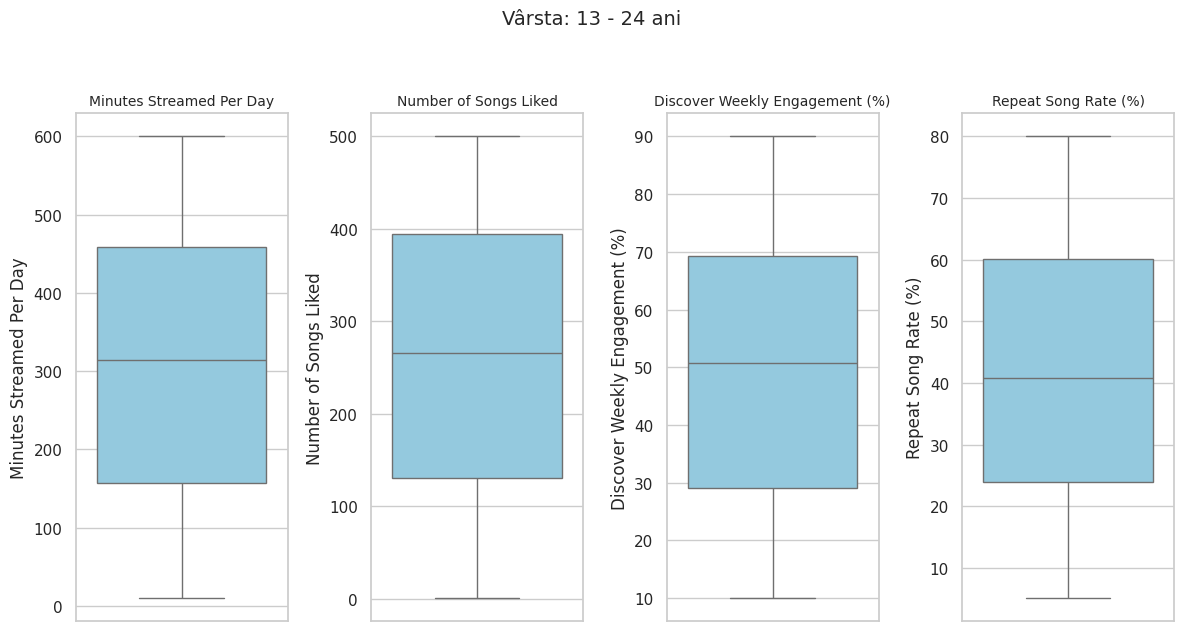

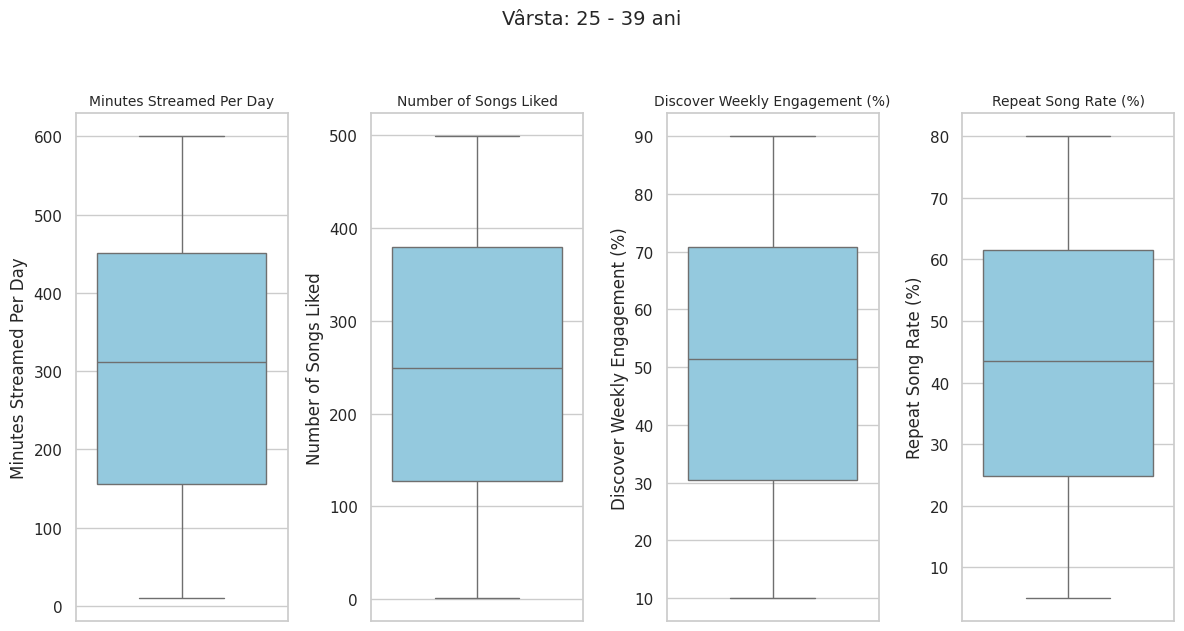

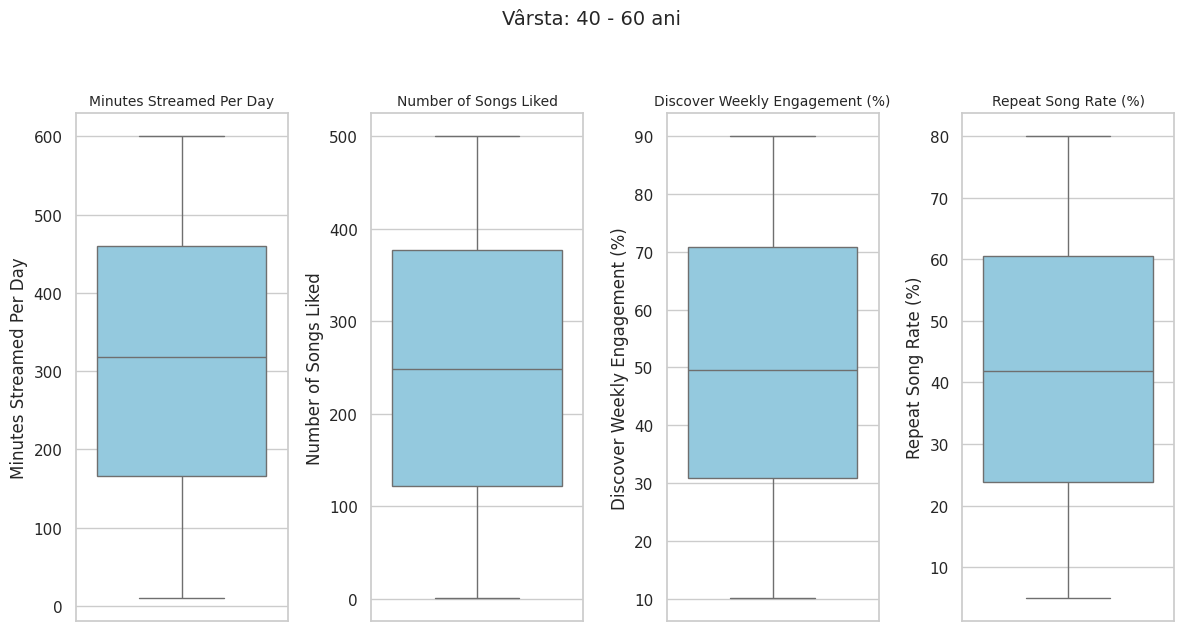

In [ ]:
# Funcție pentru a crea boxplot-urile
def plot_boxplots(data, age_range_title):
    plt.figure(figsize=(12, 6))
    features = ['Minutes Streamed Per Day', 'Number of Songs Liked',
                'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 4, i)
        sns.boxplot(y=data[feature], color='skyblue')
        plt.title(feature, fontsize=10)
        plt.xlabel('')  # scoate labelul de pe axa x
        plt.tight_layout()

    plt.suptitle(f'{age_range_title}', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# Apeluri pentru fiecare subset
plot_boxplots(df_13_24, 'Vârsta: 13 - 24 ani')
plot_boxplots(df_25_39, 'Vârsta: 25 - 39 ani')
plot_boxplots(df_40_60, 'Vârsta: 40 - 60 ani')

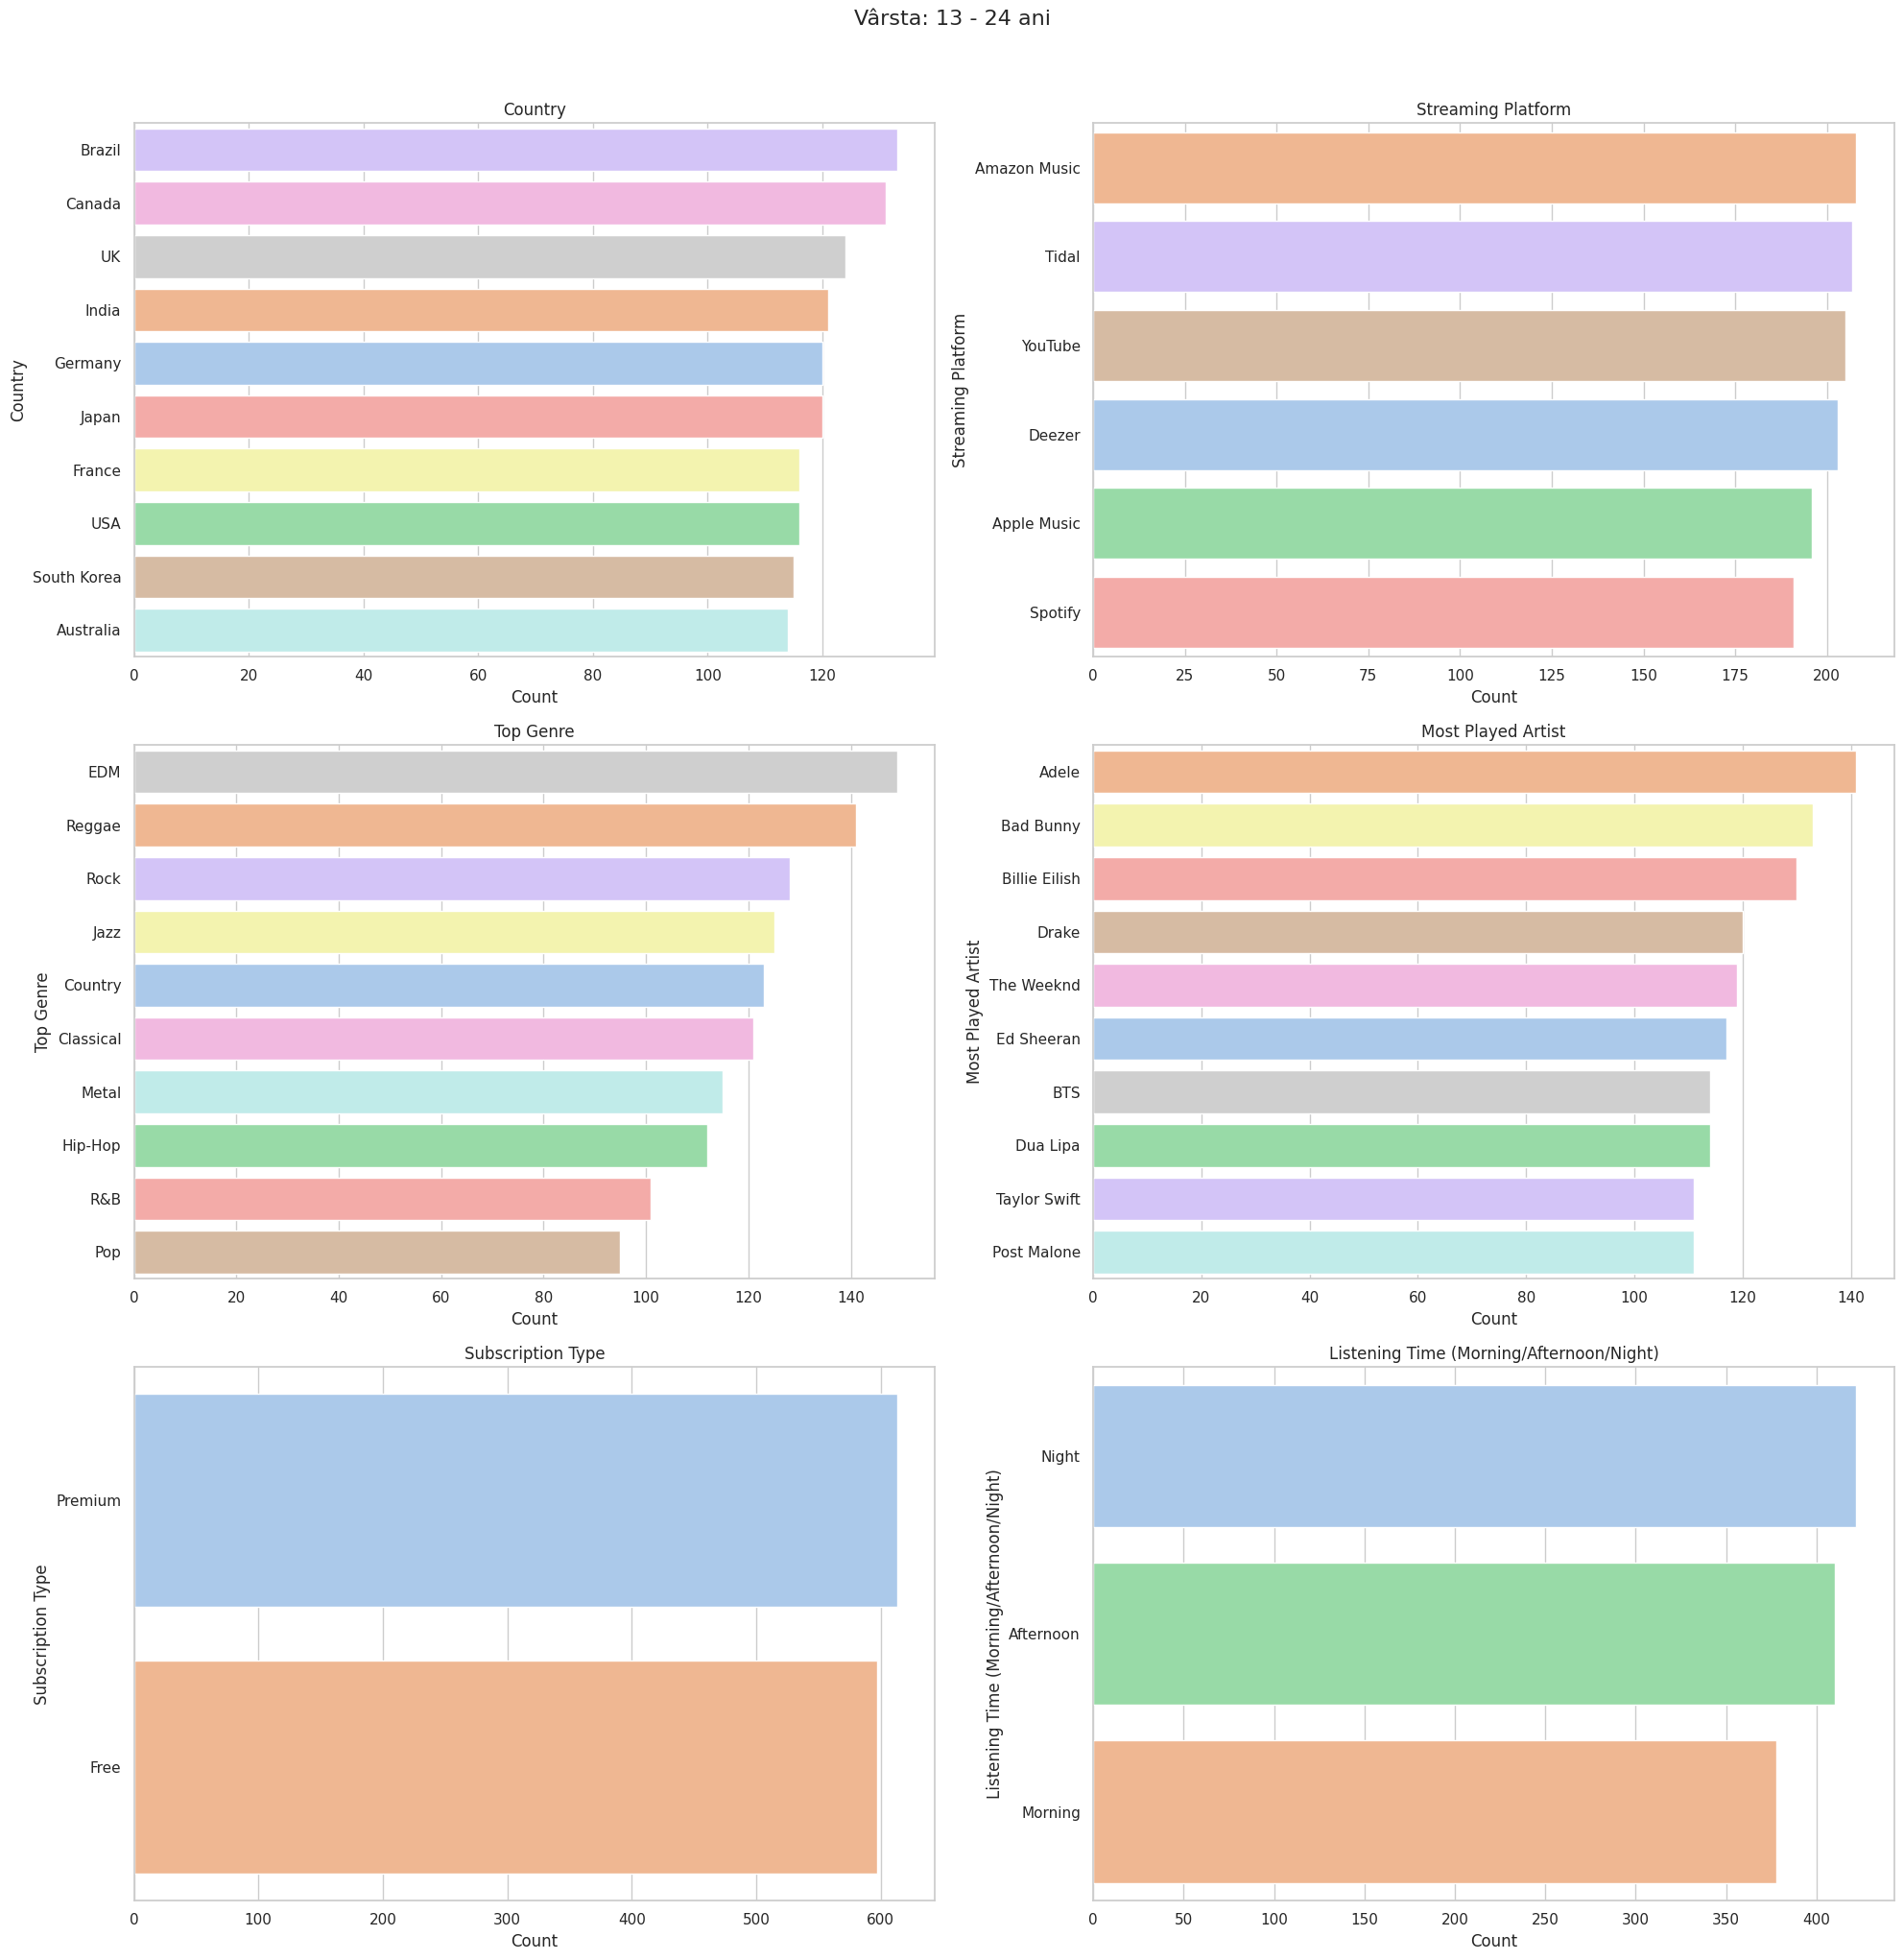

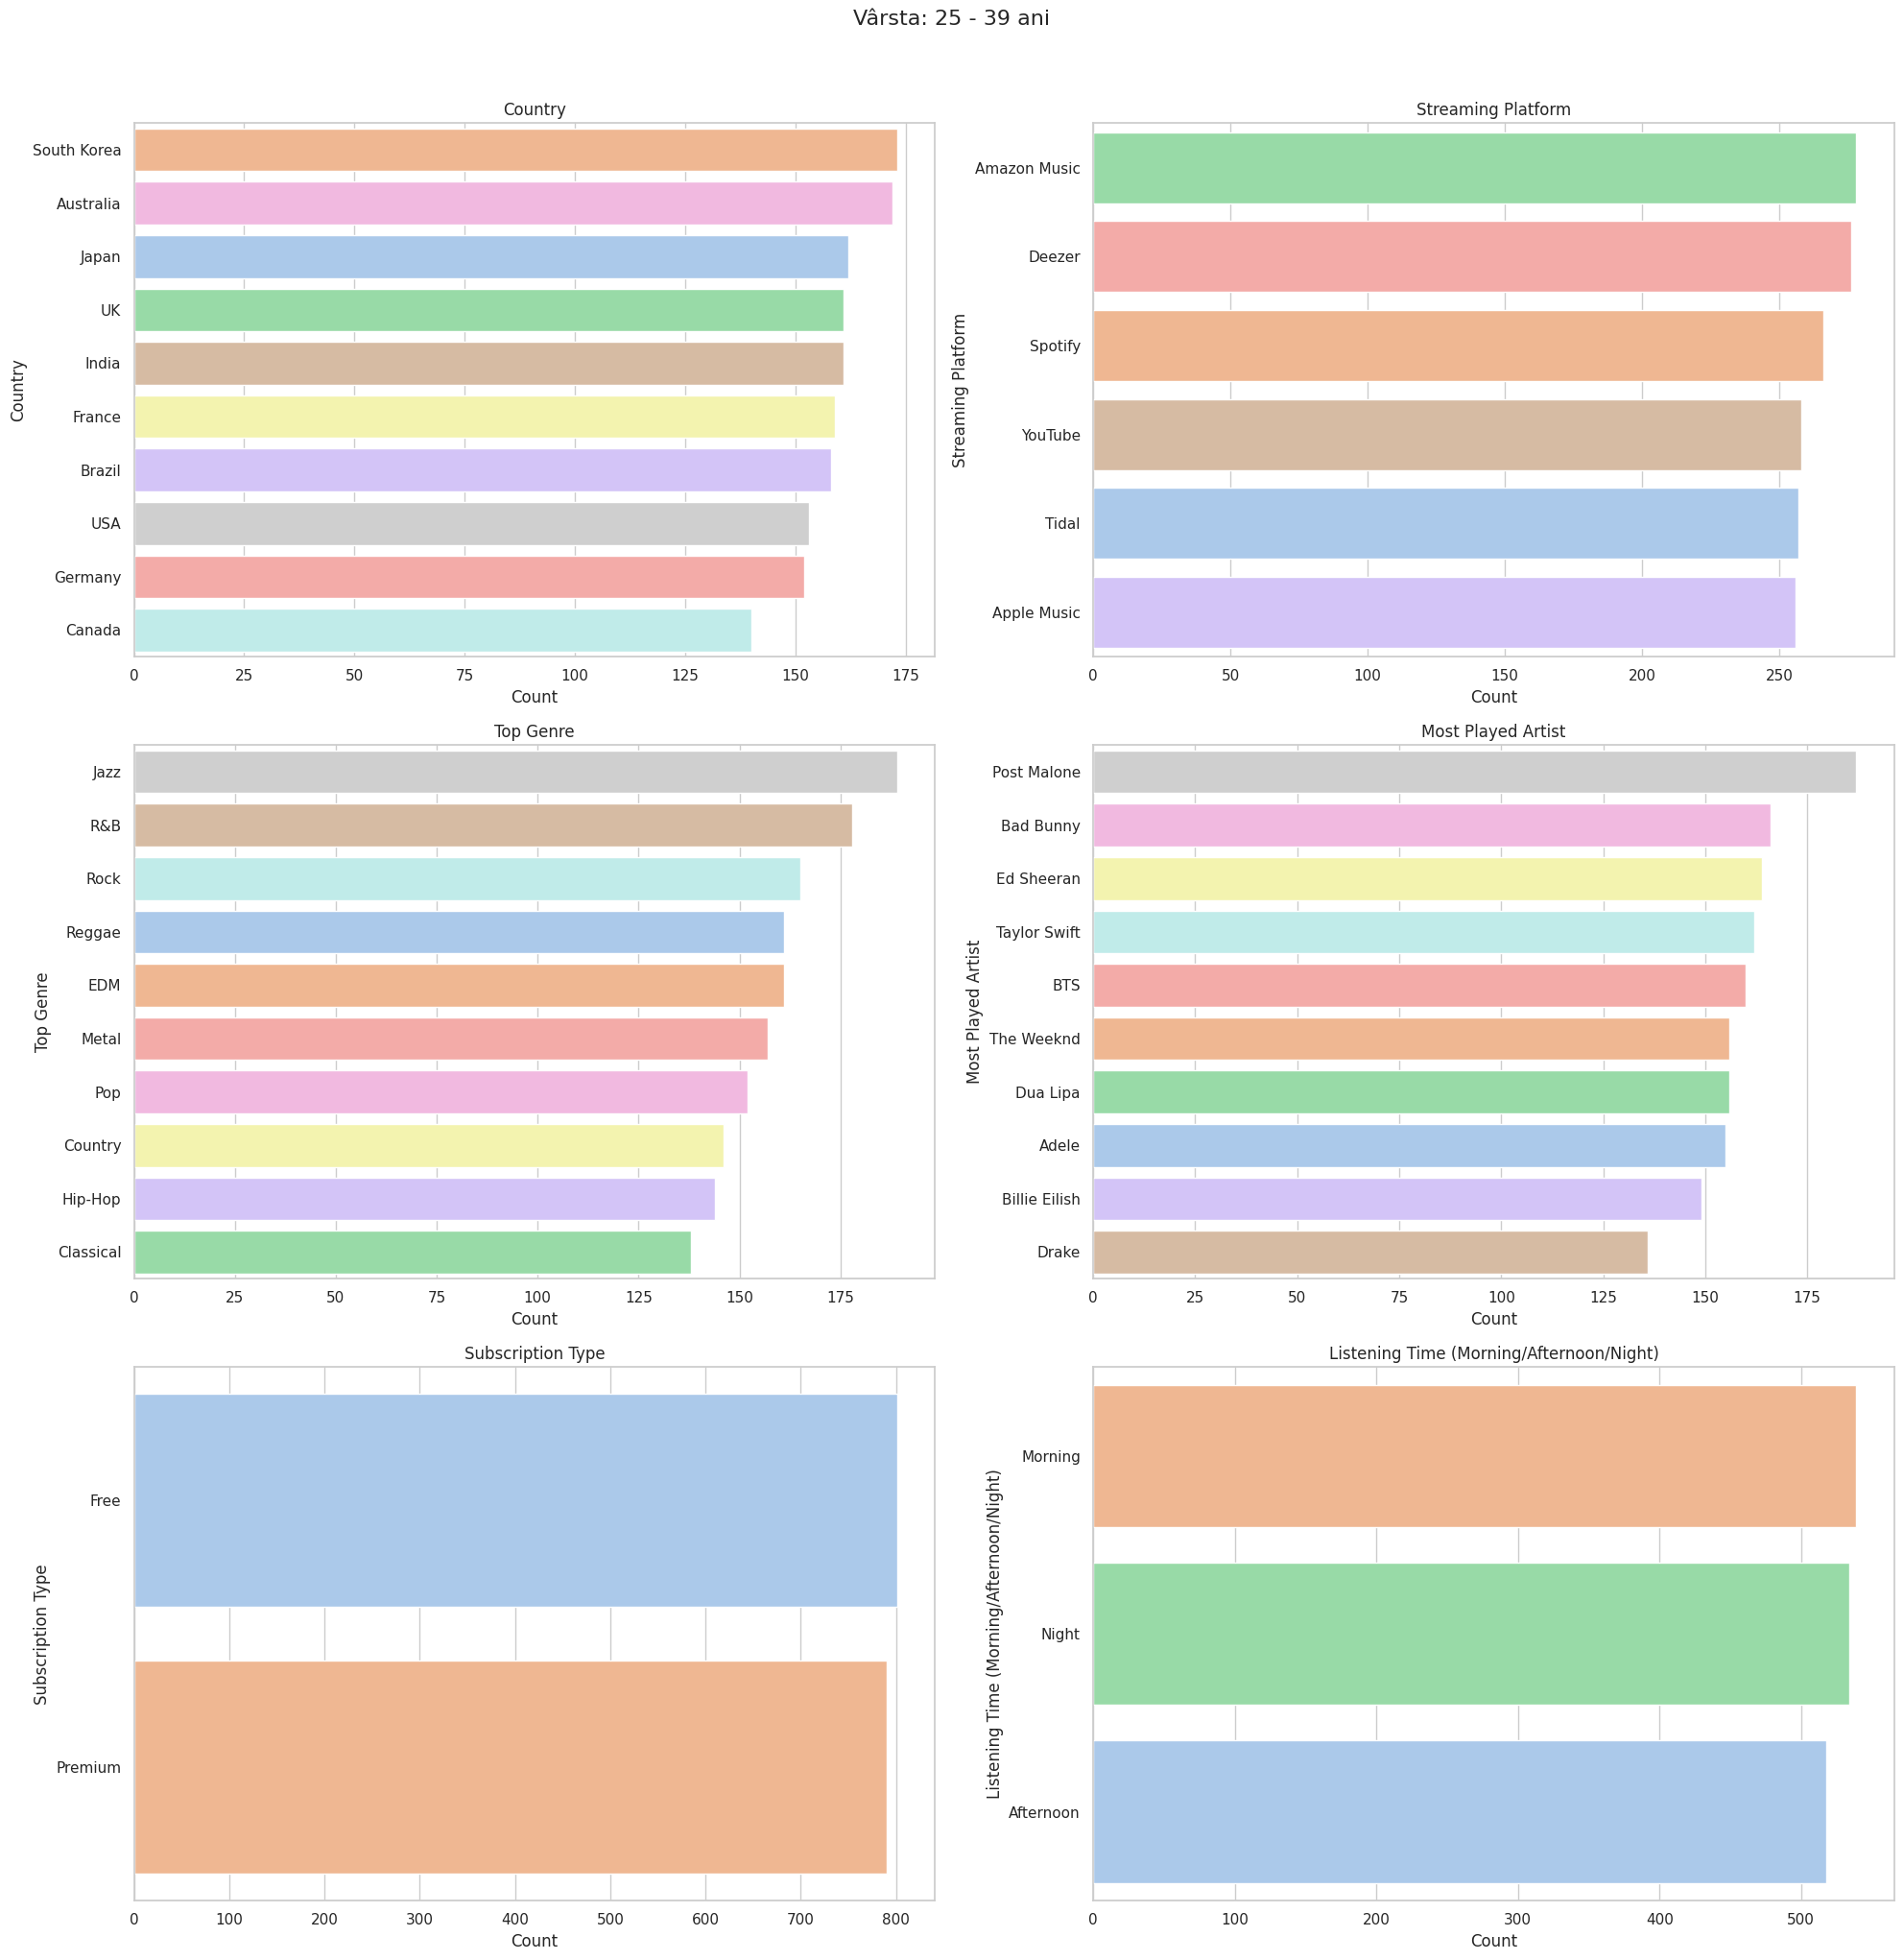

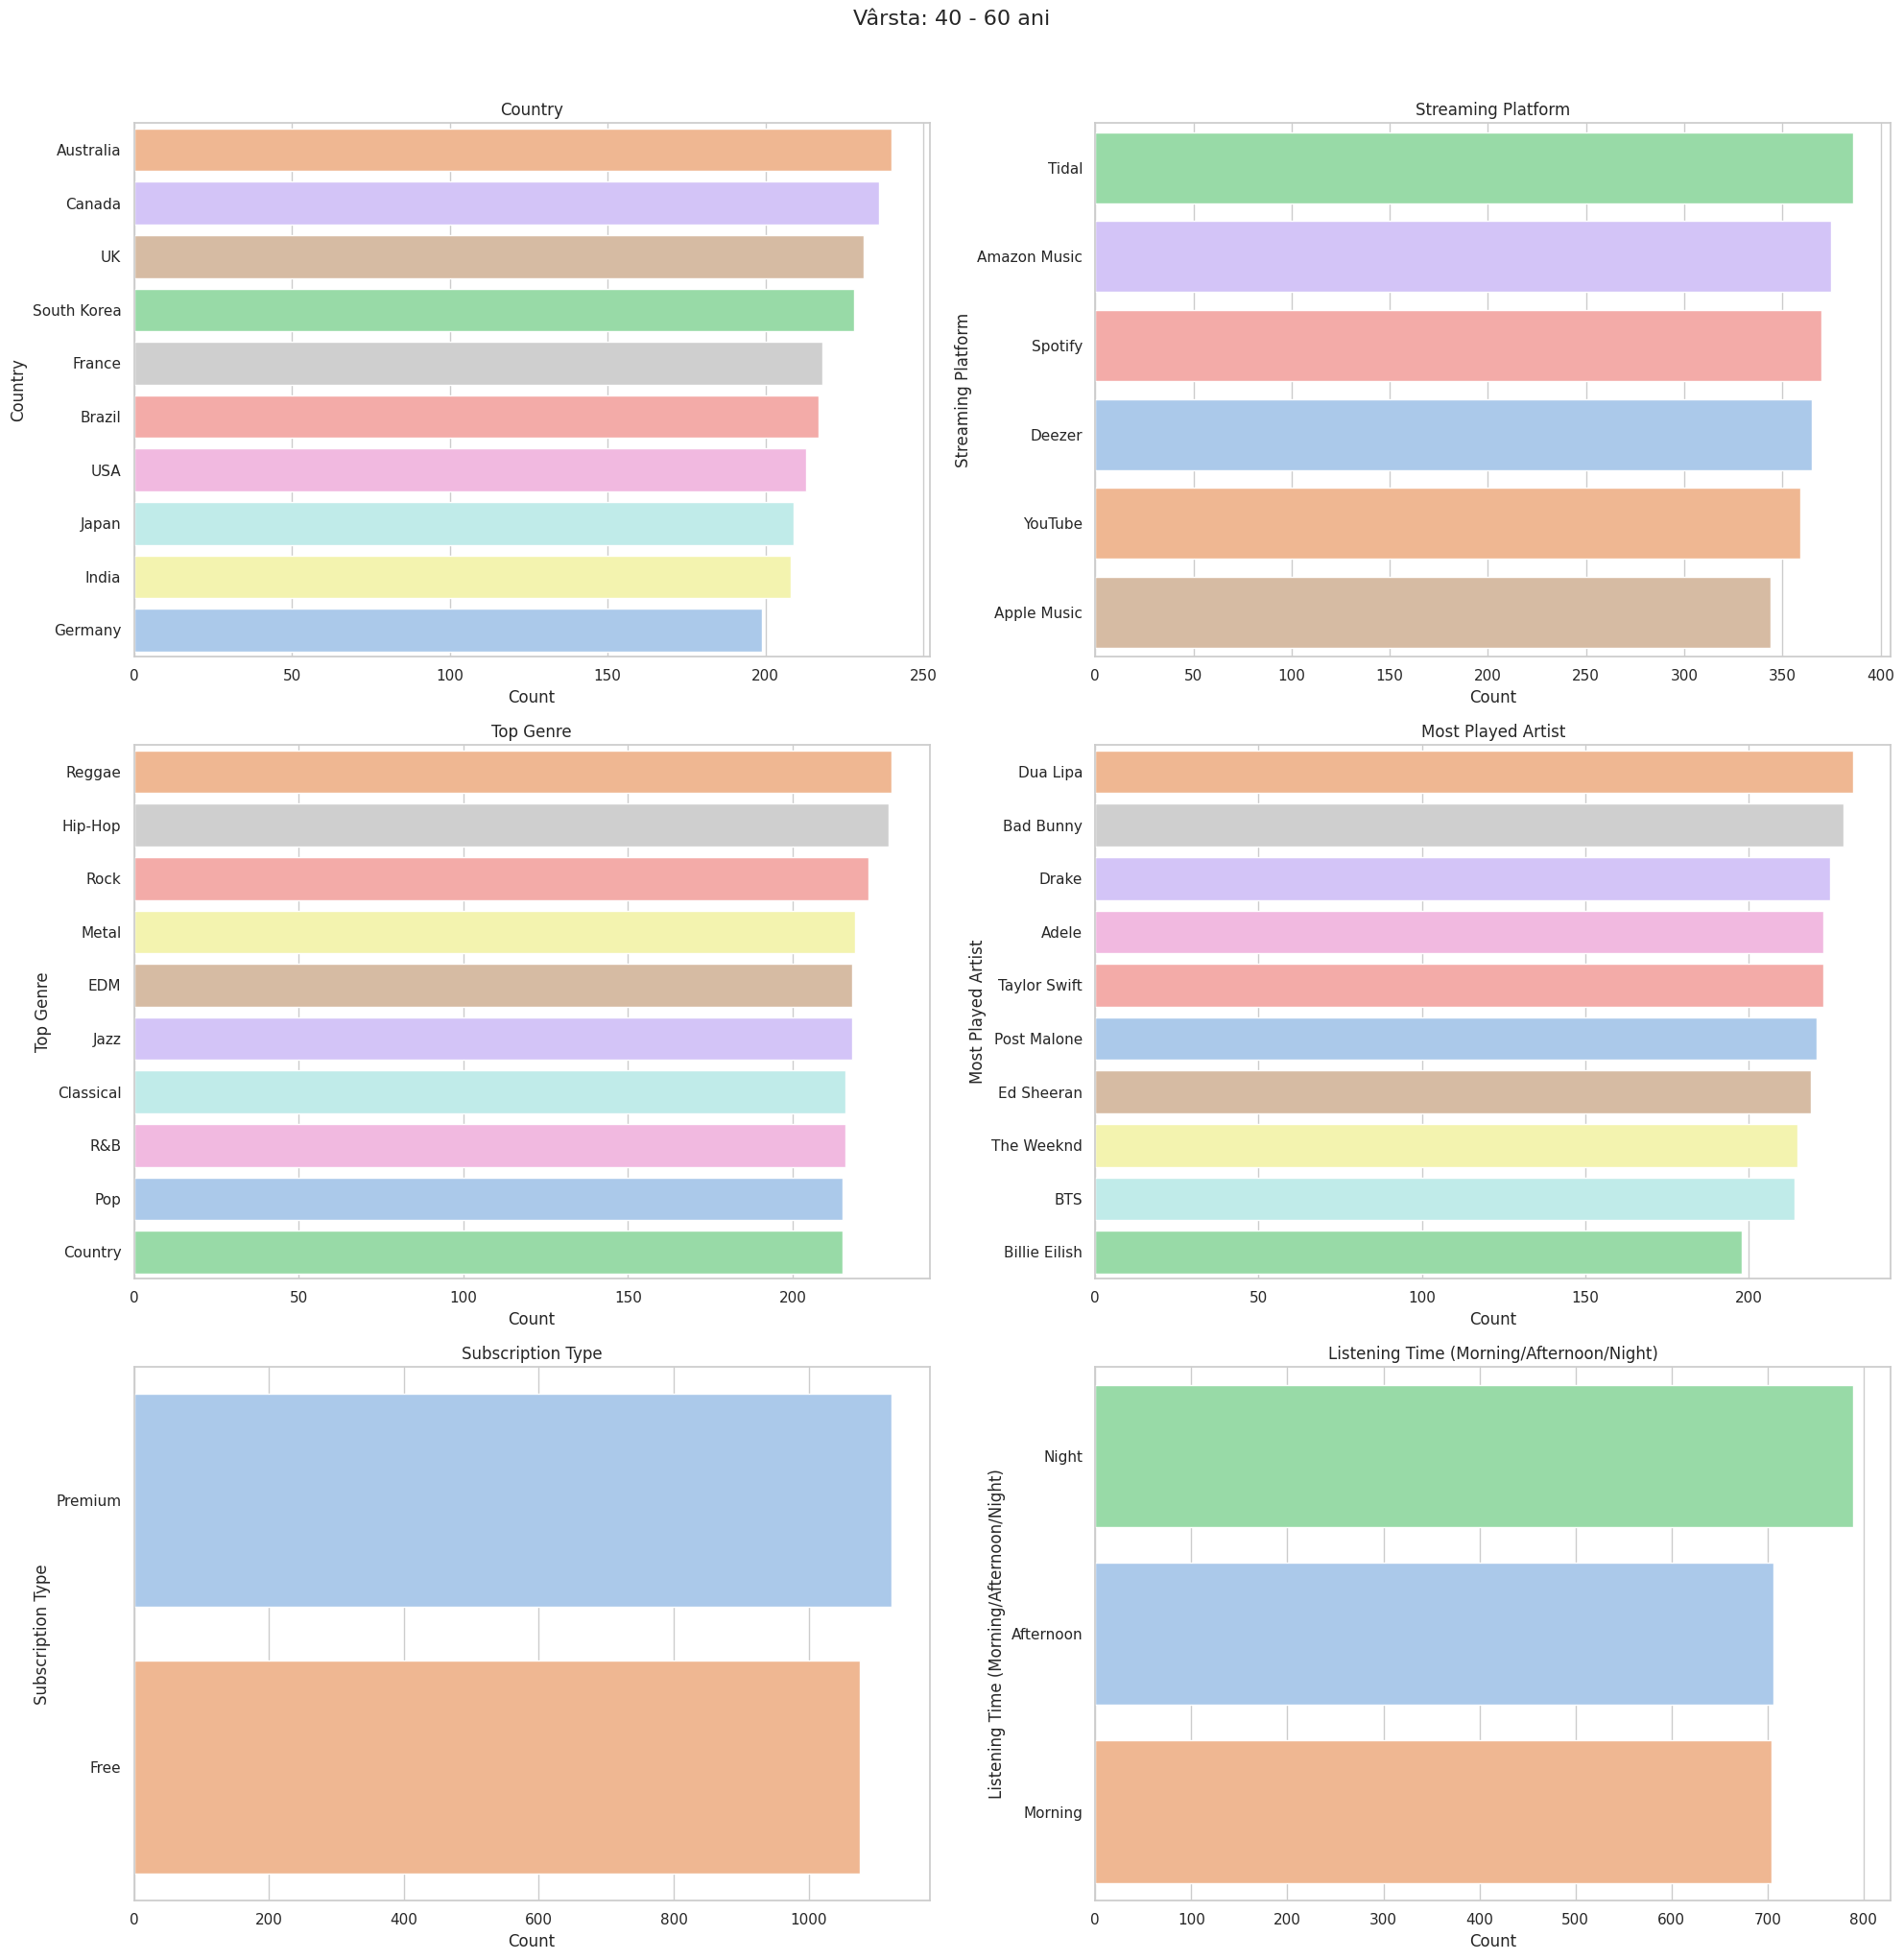

In [ ]:
categorical_columns = ['Country', 'Streaming Platform', 'Top Genre',
                       'Most Played Artist', 'Subscription Type',
                       'Listening Time (Morning/Afternoon/Night)']

# Funcție pentru a plota distribuțiile categorice
def plot_categorical_distributions(data, age_range_title):
    num_plots = len(categorical_columns)
    plt.figure(figsize=(20, 20))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot((num_plots + 1) // 2, 2, i)
        sns.countplot(y=col, data=data, order=data[col].value_counts().index, hue=col, palette='pastel', legend=False)
        plt.title(col)
        plt.xlabel('Count')
        plt.tight_layout()

    plt.suptitle(f'{age_range_title}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Apeluri pentru fiecare subset de vârstă
plot_categorical_distributions(df_13_24, 'Vârsta: 13 - 24 ani')
plot_categorical_distributions(df_25_39, 'Vârsta: 25 - 39 ani')
plot_categorical_distributions(df_40_60, 'Vârsta: 40 - 60 ani')

In [ ]:
germanias = df[df['Country']=='Germany']
top_genre_india = germanias.groupby('Top Genre')
genre =  top_genre_india['Minutes Streamed Per Day'].sum()
genre = genre.sort_values(ascending=False)
genre  =  dict(genre)
for key in genre.keys():
    genre[key] /=60

<ipython-input-129-0c4b77914fdd>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




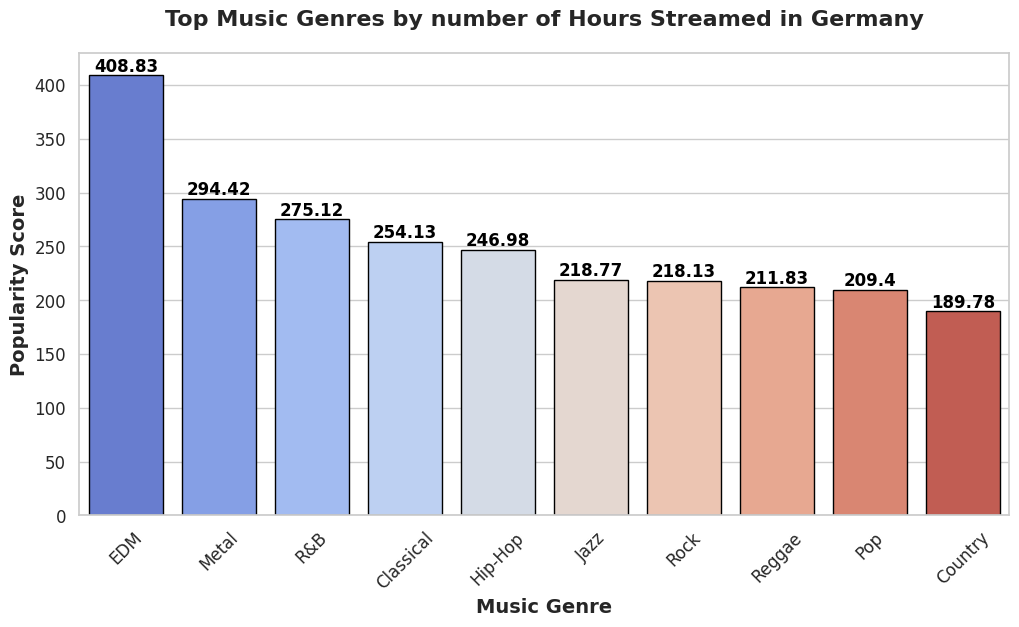

In [ ]:
genres = list(genre.keys())
values = [round(value, 2) for value in genre.values()]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=genres, y=values, palette="coolwarm", edgecolor="black")

plt.xlabel("Music Genre", fontsize=14, fontweight='bold')
plt.ylabel("Popularity Score", fontsize=14, fontweight='bold')
plt.title("Top Music Genres by number of Hours Streamed in Germany", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

<ipython-input-130-678442bd8788>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




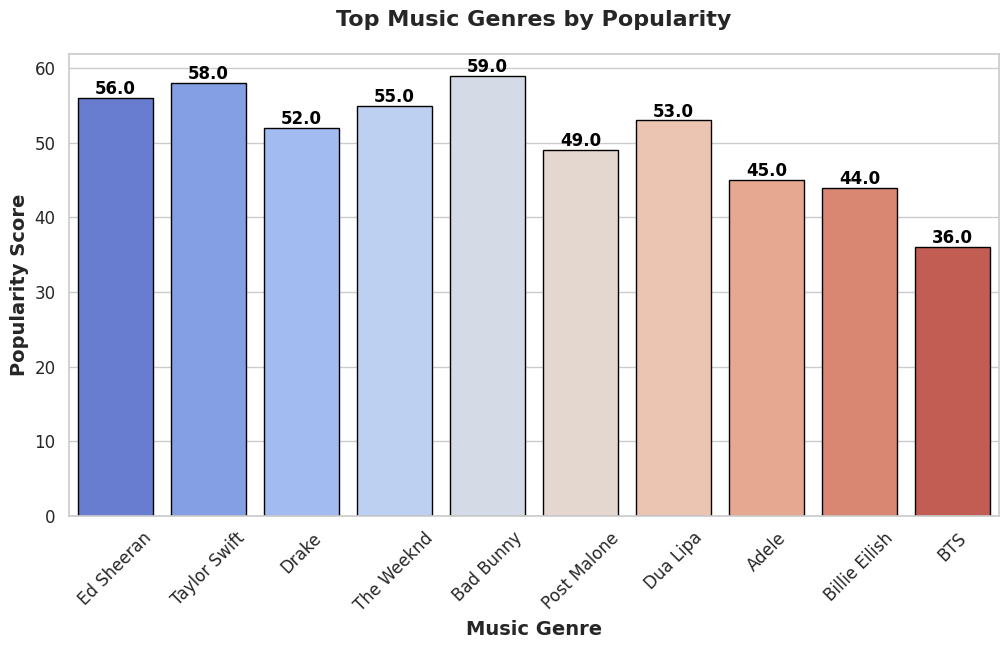

In [ ]:
canada = df[df['Country']=='Canada']
canada['Subscription Type'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.countplot(x=canada["Most Played Artist"], palette="coolwarm", edgecolor="black")

plt.xlabel("Music Genre", fontsize=14, fontweight='bold')
plt.ylabel("Popularity Score", fontsize=14, fontweight='bold')
plt.title("Top Music Genres by Popularity", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

<Figure size 1200x600 with 0 Axes>

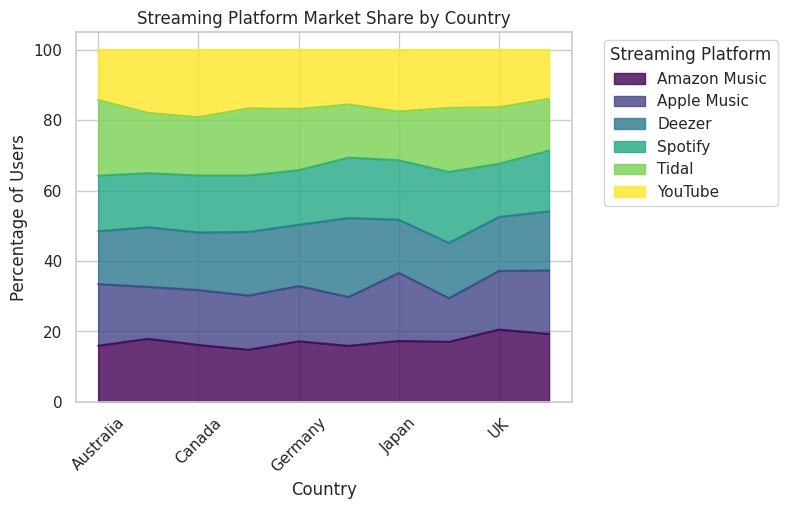

In [ ]:
df_pivot = df.pivot_table(index="Country", columns="Streaming Platform", aggfunc="size", fill_value=0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
df_pivot.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8)
plt.title("Streaming Platform Market Share by Country")
plt.ylabel("Percentage of Users")
plt.xlabel("Country")
plt.legend(title="Streaming Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import pycountry

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

country_counts['iso_alpha'] = country_counts['Country'].apply(get_country_code)

country_counts = country_counts.dropna(subset=['iso_alpha'])

fig = px.choropleth(
    country_counts,
    locations='iso_alpha',
    color='Count',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Number of Listeners by Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5
)

fig.show()


In [ ]:
import kaggle

kaggle.api.dataset_download_files("ivannatarov/spotify-daily-top-200-songs-with-genres-20172021", path='./data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/ivannatarov/spotify-daily-top-200-songs-with-genres-20172021


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/data/data.csv', sep='#')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321200 entries, 0 to 321199
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Position    321200 non-null  int64 
 1   Track Name  321182 non-null  object
 2   Artist      321182 non-null  object
 3   Streams     321200 non-null  int64 
 4   Date        321200 non-null  object
 5   Genre       321182 non-null  object
dtypes: int64(2), object(4)
memory usage: 14.7+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
artist_stats = df1.groupby(['Artist', 'Genre']).agg({
    'Streams': ['sum', 'mean', 'count']
}).reset_index()

artist_stats.columns = ['Artist', 'Genre', 'Total_Streams', 'Avg_Streams', 'Stream_Count']


In [ ]:
# Ensure both keys are strings
df['Most Played Artist'] = df['Most Played Artist'].astype(str)
artist_stats['Artist'] = artist_stats['Artist'].astype(str)

# Merge on artist
df_merged = pd.merge(df, artist_stats,
                     left_on='Most Played Artist',
                     right_on='Artist',
                     how='left')

# Fill missing values from merge
df_merged[['Total_Streams', 'Avg_Streams', 'Stream_Count']] = df_merged[[
    'Total_Streams', 'Avg_Streams', 'Stream_Count'
]].fillna(0)


In [ ]:
# Drop only existing columns safely
columns_to_drop = ['User_ID', 'Most Played Artist', 'Artist']
df_model = df_merged.drop(columns=[col for col in columns_to_drop if col in df_merged.columns])

# One-hot encode categorical features
df_model = pd.get_dummies(df_model,
                          columns=['Country', 'Streaming Platform', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)'],
                          drop_first=True)

# Encode target label
le = LabelEncoder()
df_model['Top_Genre_Label'] = le.fit_transform(df_model['Top Genre'])

# Drop original target column
df_model = df_model.drop(columns=['Top Genre'])


In [ ]:
X = df_model.drop(columns=['Top_Genre_Label'])
y = df_model['Top_Genre_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: "['pop soul', 'british soul', 'uk pop', 'pop']"

In [ ]:
from sklearn.exceptions import NotFittedError

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

results = {}

X_train = pd.DataFrame(X_train).fillna(0)
X_test = pd.DataFrame(X_test).fillna(0)
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(0)
X_test_scaled = pd.DataFrame(X_test_scaled).fillna(0)

for name, model in models.items():
    try:
        if name in ["SVM", "Logistic Regression"]:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results[name] = {
            "accuracy": acc,
            "y_pred": y_pred,
            "model": model
        }
        print(f"🔹 {name} Accuracy: {acc:.4f}")

    except ValueError as e:
        print(f"⚠️ Model {name} failed due to error: {e}")


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[r['accuracy'] for r in results.values()])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_y_pred = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/abhiramag/spotify-data-960k/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231331 entries, 0 to 231330
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              231331 non-null  object 
 1   album_name        231331 non-null  object 
 2   artists           231331 non-null  object 
 3   danceability      231331 non-null  float64
 4   energy            231331 non-null  float64
 5   key               204953 non-null  object 
 6   loudness          231331 non-null  float64
 7   mode              220554 non-null  object 
 8   speechiness       231331 non-null  float64
 9   acousticness      231331 non-null  float64
 10  instrumentalness  231331 non-null  float64
 11  liveness          231331 non-null  float64
 12  valence           231331 non-null  float64
 13  tempo             231331 non-null  int64  
 14  lyrics            231331 non-null  object 
 15  duration          231331 non-null  int64  
dtypes: float64(8), int64

In [ ]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000,231331.000000
mean,0.548704,0.634186,-8.210712,0.084033,0.292591,0.080328,0.220871,0.481462,121.695367,233.686333
std,0.171167,0.241545,3.914282,0.097248,0.315779,0.210470,0.199623,0.248626,29.569951,91.972618
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.433000,0.459000,-10.218000,0.034000,0.015000,0.000000,0.099000,0.278000,99.000000,185.000000
50%,0.556000,0.665000,-7.407000,0.046000,0.154000,0.000000,0.135000,0.470000,120.000000,222.000000
75%,0.674000,0.840000,-5.440000,0.086000,0.539000,0.009000,0.282000,0.679000,140.000000,265.000000
max,0.993000,1.000000,3.744000,0.966000,0.996000,1.000000,1.000000,1.000000,246.000000,5764.000000


In [ ]:
df.head()

,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics,duration
0,When I Survey - The Wondrous Cross,Satisfy,Kathryn Scott,0.417,0.067,A♯/B♭,-13.130,None,0.034,0.850,0.000,0.112,0.191,73,When I survey the wondrous cross\n On which th...,237
1,I Would Like,So Good,Zara Larsson,0.486,0.713,D,-3.949,minor scale,0.052,0.085,0.000,0.084,0.297,121,I didn't know that I could want you so deep\n ...,226
2,I HOPE,color on me,KANG DANIEL,0.683,0.773,G,-4.724,major scale,0.038,0.014,0.000,0.299,0.405,102,수많은 일에도\n 멈출 수 없는 건\n 변하지 않는 너 yeah\n 시간이 지나도\...,187
3,Lucky lucky,Tu m'aimes-tu,Richard Desjardins,0.369,0.009,D,-28.763,minor scale,0.045,0.984,0.010,0.079,0.171,98,Étends le sable\n Allume le brasier\n Comme un...,202
4,Soul Sailin',Love Corporation (Expanded Edition),Hues Corporation,0.409,0.481,A,-10.647,major scale,0.038,0.027,0.002,0.068,0.348,134,I'm going back to the sound of the raging\n se...,214


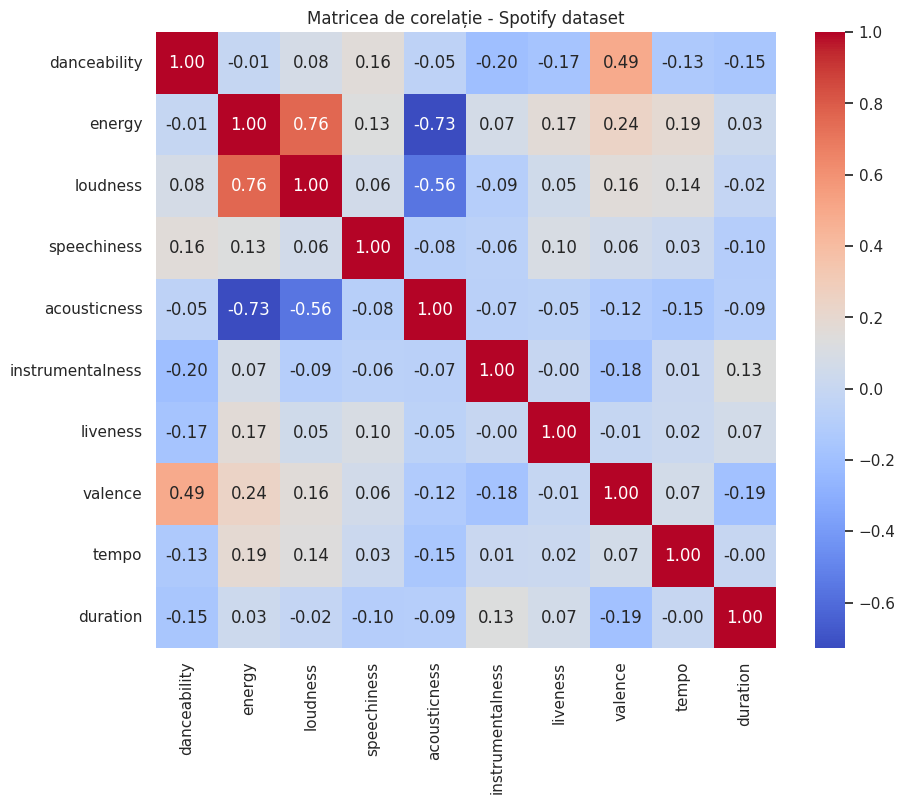

In [ ]:
# Selectăm doar coloanele numerice
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculăm matricea de corelație
correlation_matrix = numeric_cols.corr()

# Afișăm matricea cu un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matricea de corelație - Spotify dataset')
plt.show()

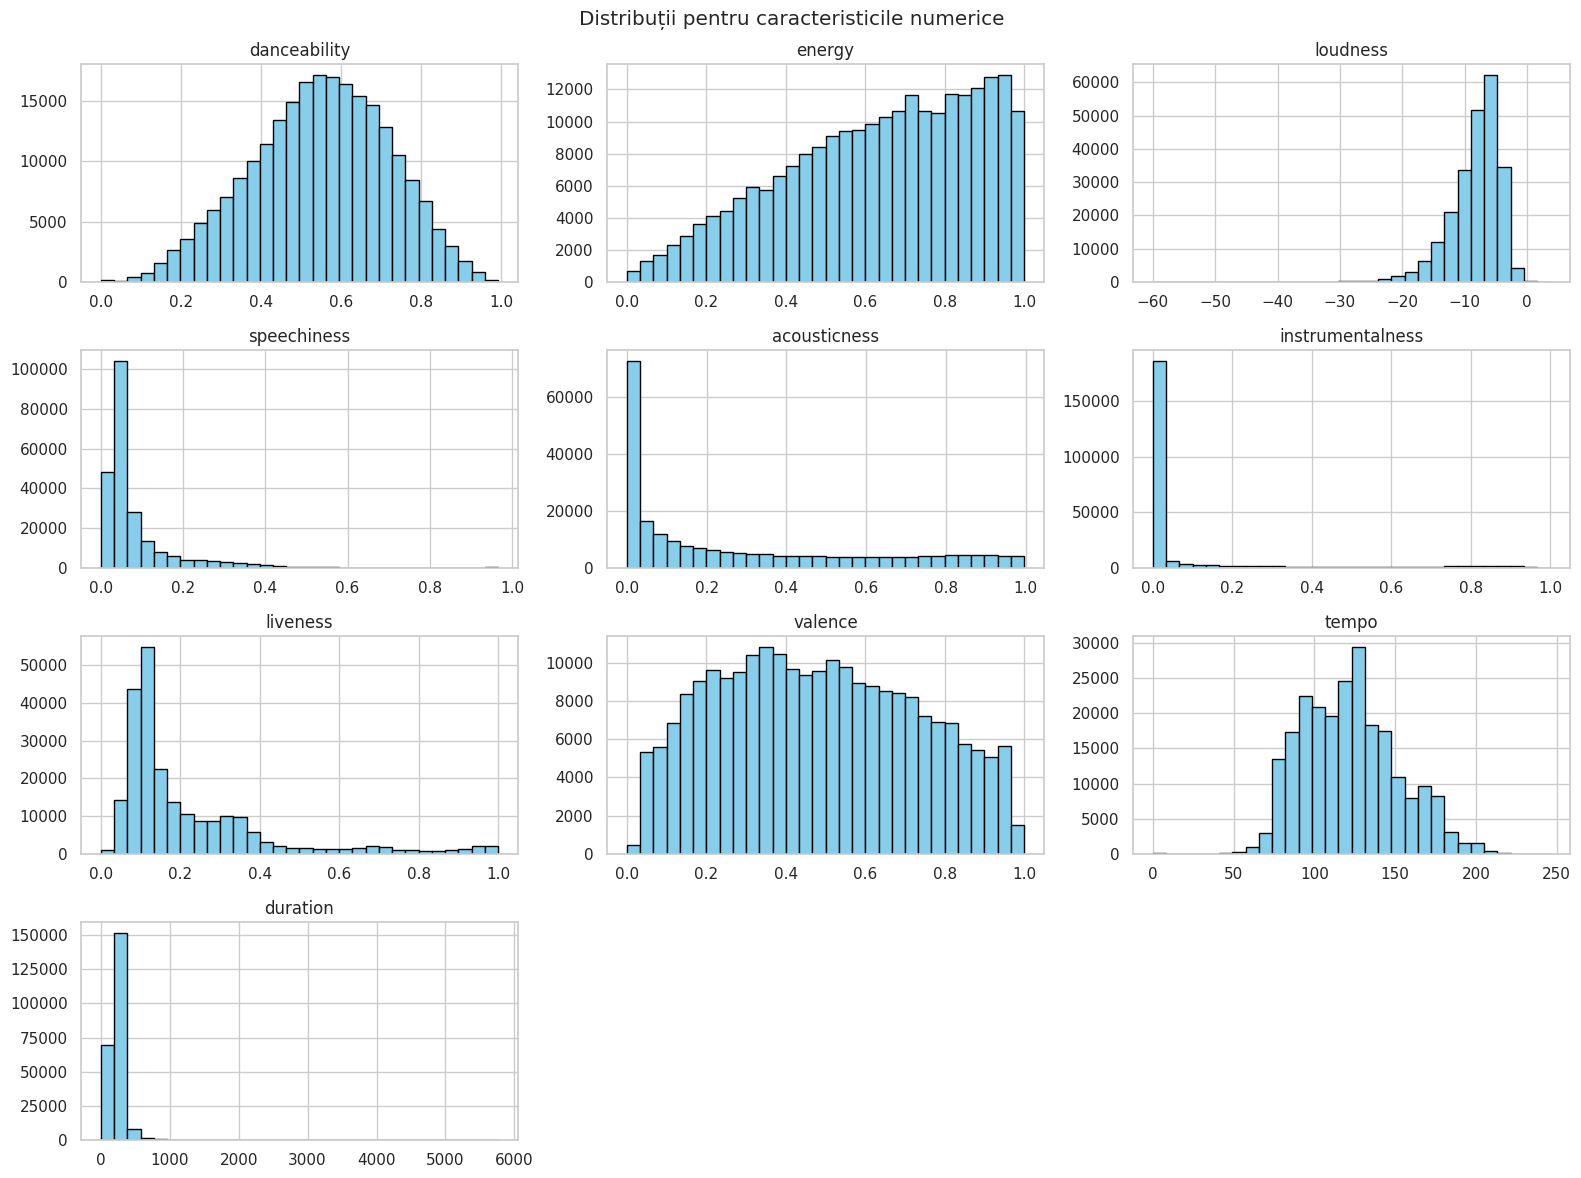

In [ ]:
from pandas.plotting import scatter_matrix

# Set stil
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Histogramă pentru fiecare feature numeric
numeric_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

df[numeric_cols].hist(bins=30, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribuții pentru caracteristicile numerice")
plt.tight_layout()
plt.show()

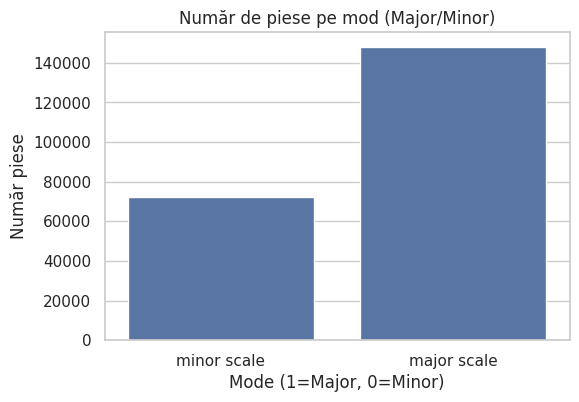

In [ ]:
# Count plot pentru 'mode' (major/minor)
plt.figure(figsize=(6, 4))
sns.countplot(x='mode', data=df)
plt.title("Număr de piese pe mod (Major/Minor)")
plt.xlabel("Mode (1=Major, 0=Minor)")
plt.ylabel("Număr piese")
plt.show()

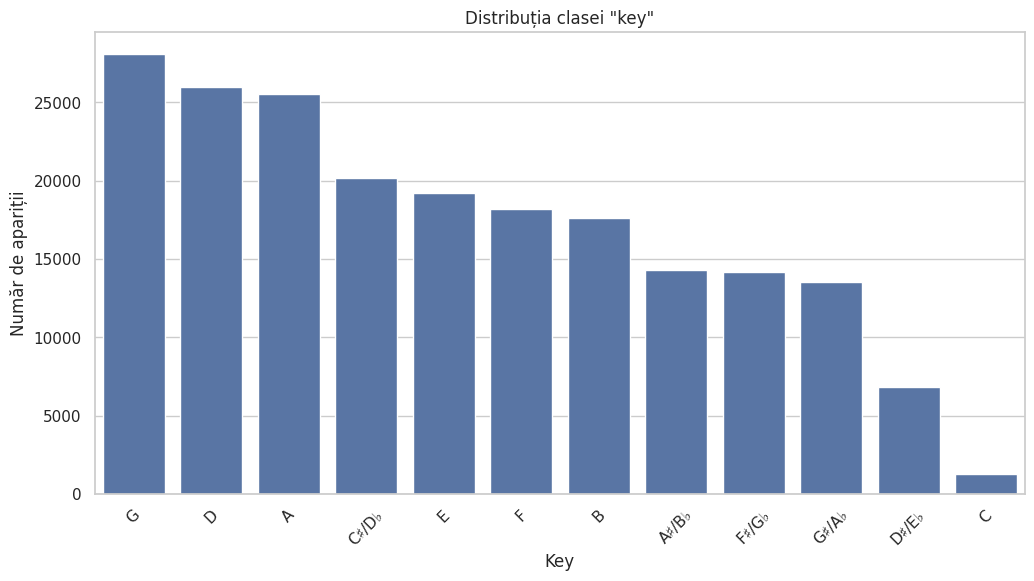

In [ ]:
# Setăm stilul graficului
sns.set(style="whitegrid")

# Plotăm distribuția valorilor din coloana 'key'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key', order=df['key'].value_counts().index)

plt.title('Distribuția clasei "key"')
plt.xlabel('Key')
plt.ylabel('Număr de apariții')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-4180e1d30ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


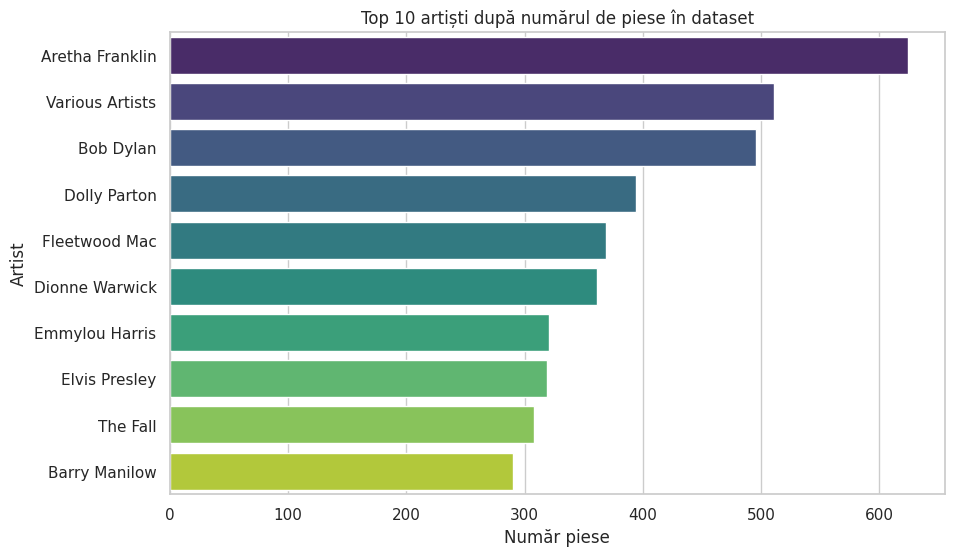

In [ ]:
# Top 10 artiști cu cele mai multe piese
top_artists = df['artists'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 artiști după numărul de piese în dataset")
plt.xlabel("Număr piese")
plt.ylabel("Artist")
plt.show()

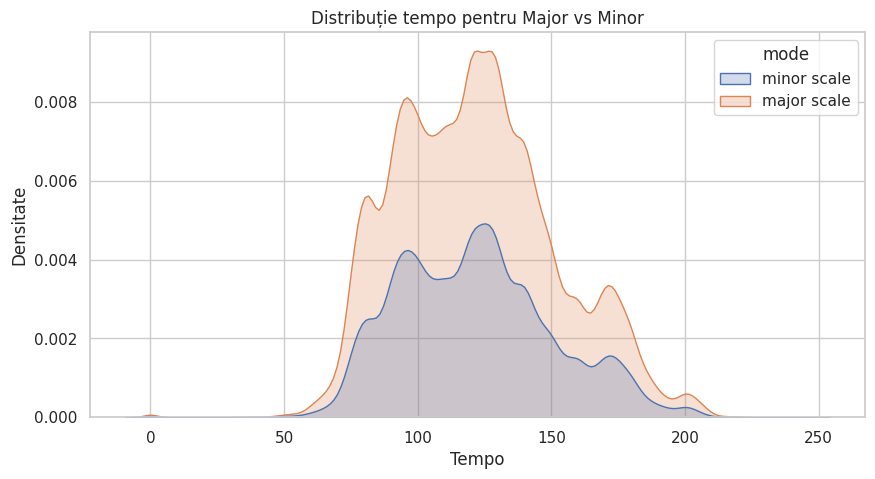

In [ ]:
# Distribuție 'tempo' în funcție de 'mode'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="tempo", hue="mode", fill=True)
plt.title("Distribuție tempo pentru Major vs Minor")
plt.xlabel("Tempo")
plt.ylabel("Densitate")
plt.show()

In [ ]:
# Pregătire date: păstrăm doar înregistrările fără NaN în 'mode'
df = df.dropna(subset=['mode'])

# Encoding pentru 'mode'
le = LabelEncoder()
df.loc[:, 'mode_encoded'] = le.fit_transform(df['mode'])

# Selectăm feature-urile numerice
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

X = df[features]
y = df['mode_encoded']

# Standardizare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-6-52bedd5c702f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mode_encoded'] = le.fit_transform(df['mode'])


In [ ]:
# Modele ML
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=6, subsample=0.7, n_jobs=-1)
}

# Antrenare și evaluare
results = {'Model': [], 'Accuracy': [], 'F1 Score': []}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)

# Rezultate într-un DataFrame
results_df = pd.DataFrame(results)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


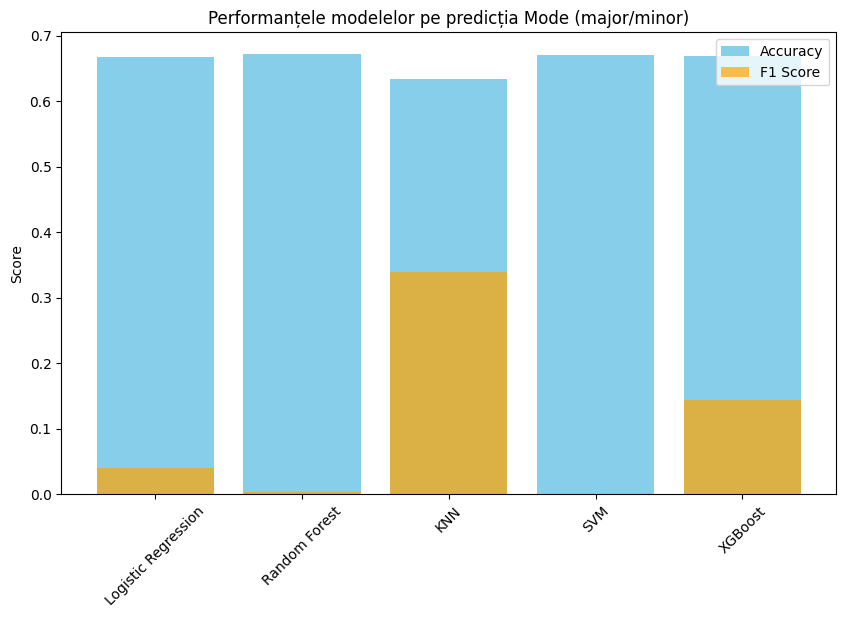

In [ ]:
# Plot performanțe
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue', label='Accuracy')
plt.bar(results_df['Model'], results_df['F1 Score'], color='orange', alpha=0.7, label='F1 Score')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Performanțele modelelor pe predicția Mode (major/minor)')
plt.legend()
plt.show()

In [ ]:
# Afișare tabel rezultate
print(results_df)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.667929  0.039475
1        Random Forest  0.671352  0.003300
2                  KNN  0.633901  0.338779
3                  SVM  0.671057  0.000000
4              XGBoost  0.668835  0.143728


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pregătim datele
df_key = df.dropna(subset=['key']).copy()

# Encode key
le_key = LabelEncoder()
df_key['key_encoded'] = le_key.fit_transform(df_key['key'].astype(str))

# Features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

X = df_key[features]
y = df_key['key_encoded']

# Standardizare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Definim modelele
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=6, subsample=0.7, n_jobs=-1)
}

# Antrenare și evaluare
results = {'Model': [], 'Accuracy': [], 'F1 Score': []}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)

results_df = pd.DataFrame(results)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


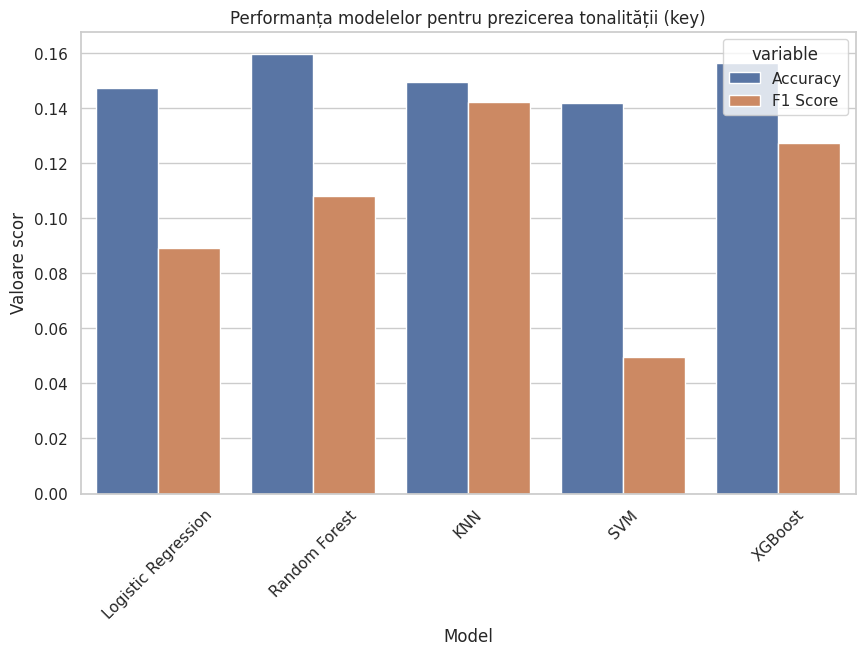

In [ ]:
# Plot comparativ
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Performanța modelelor pentru prezicerea tonalității (key)")
plt.ylabel("Valoare scor")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(results_df)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.147301  0.089142
1        Random Forest  0.159864  0.108039
2                  KNN  0.149496  0.142417
3                  SVM  0.142007  0.049762
4              XGBoost  0.156254  0.127444


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
features = ['danceability', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']
target = 'energy'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

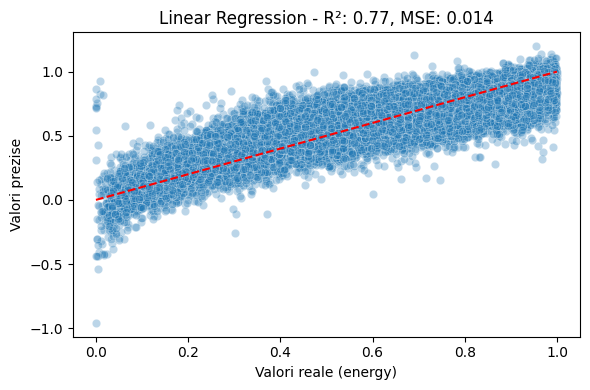

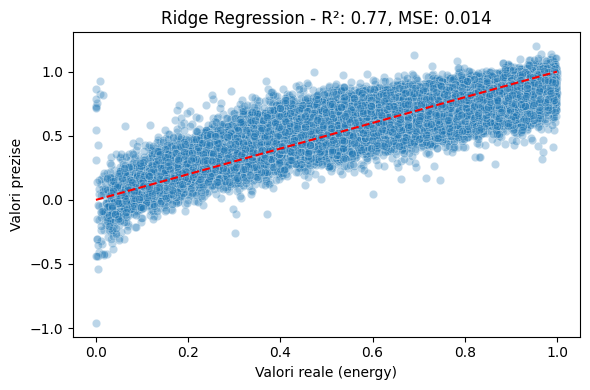

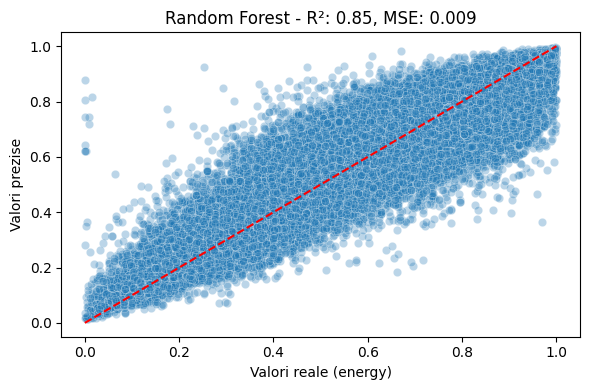

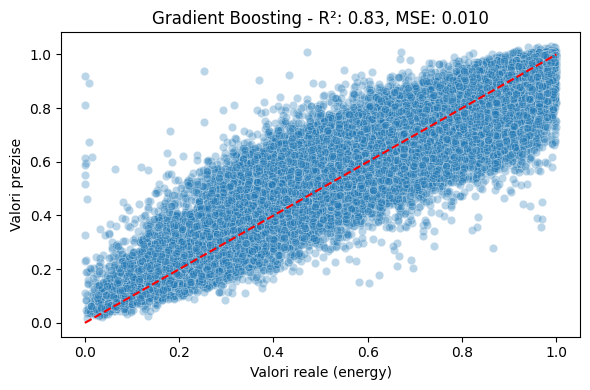

In [5]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"mse": mse, "r2": r2}

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=preds, alpha=0.3)
    plt.xlabel("Valori reale (energy)")
    plt.ylabel("Valori prezise")
    plt.title(f"{name} - R²: {r2:.2f}, MSE: {mse:.3f}")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.tight_layout()
    plt.show()

In [6]:
for name, scores in results.items():
    print(f"{name}: R² = {scores['r2']:.3f}, MSE = {scores['mse']:.3f}")

Linear Regression: R² = 0.768, MSE = 0.014
Ridge Regression: R² = 0.768, MSE = 0.014
Random Forest: R² = 0.849, MSE = 0.009
Gradient Boosting: R² = 0.829, MSE = 0.010


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df['mood'] = df['valence'].apply(lambda x: 'happy' if x >= 0.5 else 'sad')

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration']

df_mood = df.dropna(subset=features + ['mood'])
X = df_mood[features]
y = df_mood['mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


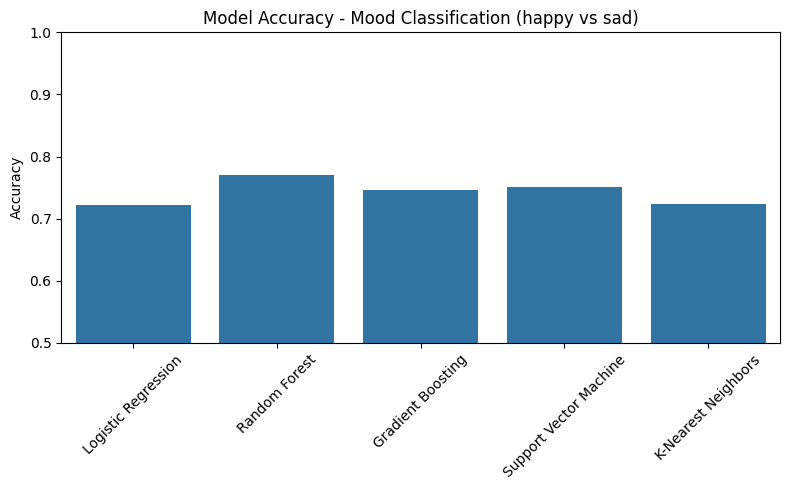

In [5]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.title('Model Accuracy - Mood Classification (happy vs sad)')
plt.tight_layout()
plt.show()